In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2, SimpleSetting
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent, DynamicFroomleAgent, UCBAgent, GreedyFroomleAgent
from BanditRec.simulator import Simulator

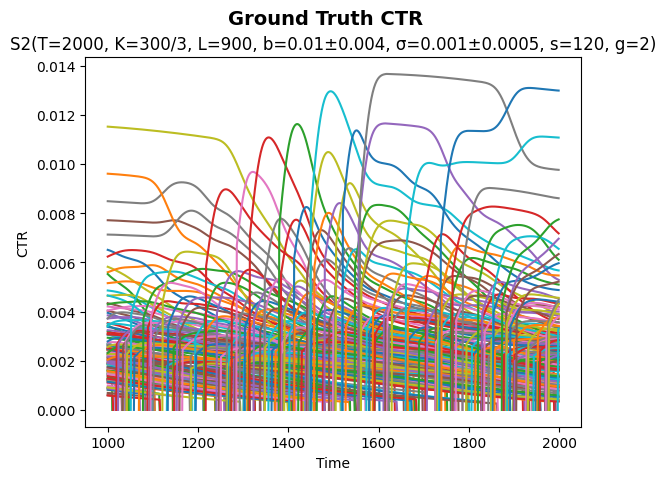

In [3]:
setting = NewsSimulationSetting2(
    SettingConfig(
        episode_count=2000, 
        item_count=300, 
        k=3, 
        episode_length=1
    ),
    lifetime=900,
    ctr_base=0.01,
    ctr_fuzz=0.004,
    sigma_base=0.001,
    sigma_fuzz=0.0005,
    smoothing=120,
    global_evolution=2,
)
setting.visualize(tmin=1000)

In [5]:
sim = Simulator(run_count=100, seed_change_interval=1)
sim.set_setting(setting)
sim.set_episode_length(50)
sim.run_oracle()

# sim.run_agent(ThompsonAgent, {'window_size': None})
# sim.run_agent(FroomleAgent, {'boost_denominator': 10_000, 'boost_ctr': 3})
# # sim.run_agent(DynamicFroomleAgent, {'boost_base_modifier': 10, 'boost_modifier': 1.0})
# sim.run_agent(DynamicFroomleAgent, {'boost_base_modifier': 10, 'boost_modifier': 1.0, 'window_size_modifier': 100})
# sim.run_agent(GreedyFroomleAgent, {'learning_rate': 0.001, 'boost_ctr': 3})
# sim.run_agent(EpsGreedyAgent, {'eps': 0, 'lr': 0.001, 'q0': 0.005})

sim.run_agent(ThompsonAgent, {'window_size': None})
sim.run_agent(FroomleAgent, {'boost_denominator': 10000, 'boost_ctr': 3})
sim.run_agent(DynamicFroomleAgent, {'boost_base_modifier': 10, 'boost_modifier': 1.0})
sim.run_agent(FroomleAgent, {'boost_denominator': 1000, 'boost_ctr': 0.01})

None

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
sim.run_agent(FroomleAgent, {'boost_denominator': 5000, 'boost_ctr': 3})
None

  0%|          | 0/100 [00:00<?, ?it/s]

 S2(T=2000x50, K=300/3, L=900, b=0.01±0.004, σ=0.001±0.0005, s=120, g=2) 
     0.652 ±0.014      - FR(bd=1000, bc=0.01)
     0.645 ±0.013      - FR(bd=10000, br=3rd)
     0.633 ±0.016      - FR(bd=5000, br=3rd)
     0.610 ±0.013      - FR(bd=1000, br=1st)
     0.607 ±0.012      - DYN-FR(base=x10, ctr=x1.0)
     0.606 ±0.015      - FR(bd=1000, br=3rd)
     0.543 ±0.015      - FR(bd=5000, br=1st)
     0.473 ±0.005      - TS()



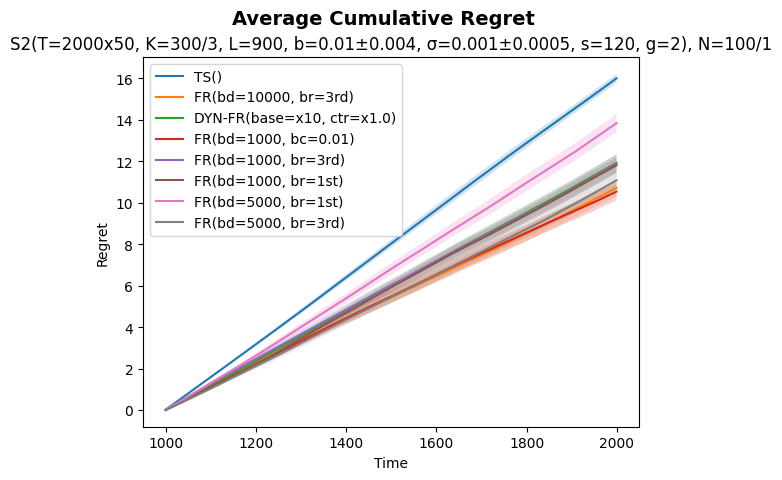

In [15]:
sim.results.ctrs(tmin=1000, relative=True)
sim.results.create_regret_plot(tmin=1000)

 S3(T=2000x300, K=300/3, b=0.01±0.004, σ=0.001±0.0005, s=120) 
     0.833 ±0.016      - ISW-DYN-FR(base=x10, ctr=x1.0, ws=x100)
     0.755 ±0.010      - TS()
     0.738 ±0.027      - FR(bd=10000, br=3rd)
     0.657 ±0.018      - DYN-FR(base=x10, ctr=x1.0)



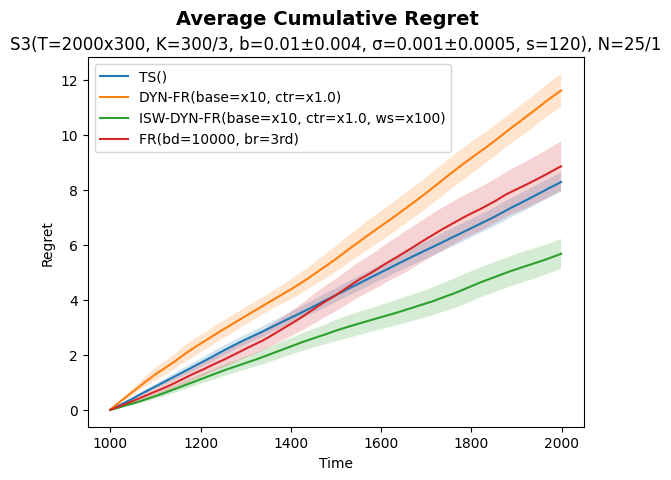

In [38]:
sim300 = sim
sim300.results.ctrs(tmin=1000, relative=True)
sim300.results.create_regret_plot(tmin=1000)